In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Transforming the Sex into 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [6]:
# Fill missing values in age
df['Age'].fillna(df['Age'].median(),inplace=True)

In [7]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [8]:
# Assuming 'df' is your DataFrame containing the 'Name' column
# Extract titles from the 'Name' column using a regular expression
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')

# Map rare titles to a common category
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Ms', 'Mme', 'Dona', 'Don'],
                                  'Rare')

# Map titles to numerical values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)

# Drop the original 'Name' column
df = df.drop(['Name'], axis=1)

# Now, 'Title' column is added to your DataFrame


In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,1


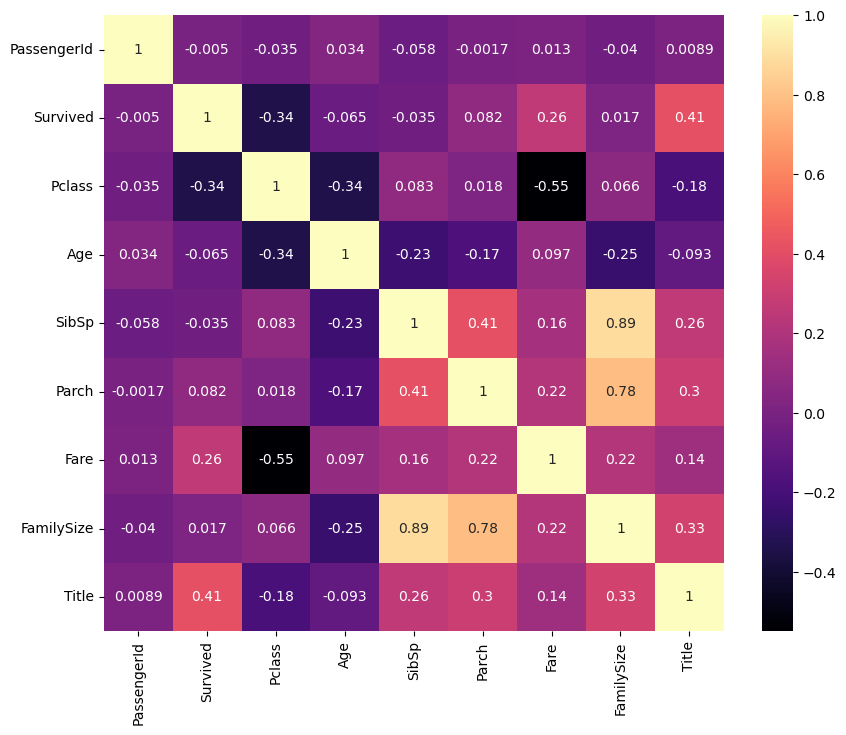

In [10]:
import matplotlib.pyplot as plt

# Exclude non-numeric columns from correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap="magma", annot=True)
plt.show()

<Axes: xlabel='Sex'>

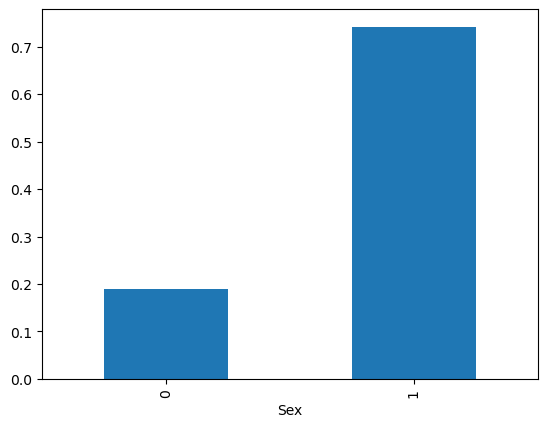

In [11]:
df.groupby('Sex').Survived.mean().plot(kind='bar')

In [12]:
X = df[['Age', 'Sex', 'FamilySize', 'Title']]
y = df['Survived']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=4))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 0.5369 - accuracy: 0.7795 - val_loss: 0.4421 - val_accuracy: 0.8380
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.8020 - val_loss: 0.4324 - val_accuracy: 0.8380
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4808 - accuracy: 0.8090 - val_loss: 0.4309 - val_accuracy: 0.8436
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.8090 - val_loss: 0.4303 - val_accuracy: 0.8436
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.8118 - val_loss: 0.4281 - val_accuracy: 0.8436
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.8146 - val_loss: 0.4333 - val_accuracy: 0.8436
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.8188 - val_loss: 0.4316 - val_accuracy: 0.8436
Epoch 8/100
3

In [15]:
X_train.shape

(712, 4)